In [ ]:
# %autosave 0

# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes

Source (Jusst read it, trust me): https://knowmledge.com/2023/11/18/ml-zoomcamp-2023-deep-learning-part-1/


## 8.1 Fashion classification

Dataset:

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [ ]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 28.94 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (3783/3783), done.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Source: https://knowmledge.com/2023/11/19/ml-zoomcamp-2023-deep-learning-part-3/

TensorFlow, an open-source machine learning library developed by Google, provides a comprehensive platform for building and deploying machine learning models.

Keras, on the other hand, is a high-level neural networks API that runs on top of TensorFlow. It simplifies the process of building and experimenting with neural networks, making it user-friendly and accessible

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Check if gpu available
len(tf.config.list_physical_devices('GPU'))

1

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

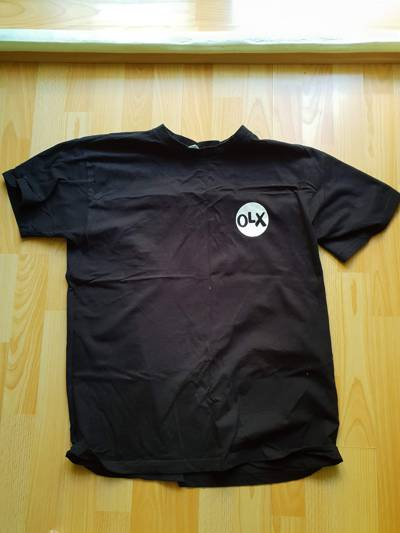

In [ ]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)  #From Keras we also import a special function for loading images called load_img.

When loading an image, you can specify the size. The reason we need to do this is that a neural network expects an image of a certain size, usually 299×299, 224×224, or 150×150. If the original size of our image is larger, we need to resize it to one of the mentioned formats.

Make sure to adjust the target_size parameter based on the input size expected by your neural network model.

In [ ]:
img = load_img(fullname, target_size=(299, 299))

In [ ]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x784E5F120390>


The library for processing images is called PIL (Python Imaging Library), and it’s used by many image processing libraries. There is also Pillow, which is a fork of PIL

The way an image is represented internally is with three channels, and for each channel, we have an array. These arrays contain numbers between 0 and 255. Each pixel is a combination of the three values for the red, green, and blue channels. The shape of that image should be (299, 299, 3) with (height, width, #channels). We can easily translate this Pillow image into a numpy array.

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]], dtype=uint8)
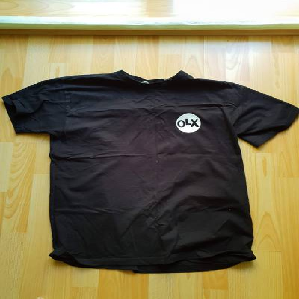

In [ ]:
x = np.array(img)
x

The dtype of this array is uint8, where “u” means unsigned, so it doesn’t have any sign, ranging from 0 to 255. The “8” signifies that it’s an integer taking 8 bits (=1 byte).

## 8.3 Pre-trained convolutional neural networks

Source: https://knowmledge.com/2023/11/19/ml-zoomcamp-2023-deep-learning-part-4/

In this part we’ll use a pre-trained convolutional neural network to understand what is on the image we load previously.

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/

This time we want to take an image and an off-the-shelf neural network that was already trained by somebody, so we can use it. Now we want to use a special model called “Xception” from Keras which was trained on ImageNet. You can find more pre-trained models on Keras. Before defining the model we need some imports first.

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(
    weights='imagenet',  # weights = "imagenet" means we want to use pre-trained network that was trained on imagenet
    input_shape=(299, 299, 3)
  )

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Now we want to use this model to classify the image, we used before. But this time the model.predict function expects a bunch of images. So let’s create an array with possibly multiple images. In this case it is just one.

In [ ]:
X = np.array([x])

In [ ]:
X.shape

(1, 299, 299, 3)

To do the prediction, we need some preprocessing before. This model expects inputs in a certain way using the preprocess_input function.

In [ ]:
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [ ]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [ ]:
pred.shape  #This 1000 means that there are 1000 different classes and 1 means there is one image.

(1, 1000)

In [ ]:
pred

array([[3.23711836e-04, 1.57383591e-04, 2.13492880e-04, 1.52370281e-04,
        2.47625838e-04, 3.05035559e-04, 3.20591673e-04, 1.47499086e-04,
        2.03621545e-04, 1.49272208e-04, 1.95662607e-04, 2.10137077e-04,
        7.59263858e-05, 1.13972041e-04, 1.62683296e-04, 2.04638316e-04,
        1.97415677e-04, 1.44288526e-04, 1.40217293e-04, 1.73685708e-04,
        7.46689271e-04, 2.56966392e-04, 2.66808463e-04, 2.96513783e-04,
        3.73601768e-04, 2.77403975e-04, 2.16570523e-04, 2.27269804e-04,
        3.80812591e-04, 1.72165688e-04, 3.05400725e-04, 1.96431050e-04,
        3.92114598e-04, 4.78070957e-04, 2.91751028e-04, 3.25693021e-04,
        1.47395025e-04, 1.62361830e-04, 2.12710453e-04, 1.34028072e-04,
        2.40070149e-04, 6.75210846e-04, 2.54943065e-04, 1.44478545e-04,
        4.12820926e-04, 2.04408367e-04, 3.02957895e-04, 1.49339408e-04,
        1.99653441e-04, 2.27005512e-04, 2.93728866e-04, 2.27444340e-04,
        6.37643505e-04, 7.82614225e-04, 2.49556906e-04, 4.052702

Each value is the probability that this image belongs to some class. To be able to make sense from this output, we need to know what are the classes. Therefor we need another function called decode_predictions to make the prediction human readable.

In [ ]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139977),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

In real, this image is a t-shirt, but ImageNet is not very good when it comes to clothes detection. That means it doesn’t really work for our purpose here. That means we need to train a different model with the classes we need for our case. Good point here, we don’t have to retrain the model from scratch. We can reuse this model. That means we can build on top of what big companies or universities have provided and adapt to our specific use case.

## 8.4 Convolutional neural networks

Source:  https://knowmledge.com/2023/11/20/ml-zoomcamp-2023-deep-learning-part-5/

* Types of layers: convolutional and dense
* Convolutional layers and filters
* Dense layers


### Easy-to-Understand Summary of Convolutional Neural Networks (CNNs)

#### What is a CNN?
A **Convolutional Neural Network (CNN)** is a type of neural network mainly used for image recognition. You can think of it as a "black box" that takes an image and makes a prediction (e.g., recognizing a t-shirt). Inside the CNN, there are different layers that process the image step by step.

---

### **1. Convolutional Layers & Filters**
CNNs have **convolutional layers** that use **filters** to detect patterns in an image.

#### **What are filters?**
Filters are tiny images (like 5×5 grids) that contain simple patterns like:
- **[ ^ ]** (Triangle shape)
- **[ – ]** (Horizontal line)
- **[ / ]** (Diagonal line)
- **[ | ]** (Vertical line)

#### **How do filters work?**
1. A filter slides over the image, checking how similar it is to different parts of the image.
2. Each time the filter is applied, a **feature map** is created, which stores similarity scores (0 = no match, 9 = strong match).
3. If we use **6 filters**, we get **6 feature maps**.
4. These feature maps are then treated as a new image and passed to the next convolutional layer.
5. Each new layer learns more complex patterns by combining the previous layer’s filters.

Example of how complexity increases:
- **Layer 1:** Simple lines and edges.
- **Layer 2:** Basic shapes like circles or corners.
- **Layer 3:** More detailed patterns like eyes or buttons.

With every layer, the CNN learns more detailed features of the image.

---

### **2. Turning an Image into a Vector**
After multiple convolutional layers, the CNN transforms the image into a **vector** (a list of numbers). Example:
- Input image: **299×299×3 (height, width, color channels)**
- Vector output: **1D array with 2,048 values**

This vector **stores all the important features** extracted from the image.

---

### **3. Dense Layers (Fully Connected Layers)**
Now that we have a vector, we pass it into **dense layers**, which make the final prediction.

- **Dense layers** take the vector and connect every value to every output neuron.
- They perform **matrix multiplication** to transform the vector into a prediction.

#### **How do we get a prediction?**
##### **Binary Classification (e.g., T-shirt or Not T-shirt)**
- The model uses **logistic regression** (sigmoid function).
- The final output is a probability: **0 (not a t-shirt) or 1 (t-shirt).**

##### **Multiple Class Classification (e.g., Shirt, T-shirt, Dress)**
- Instead of one output, we use **softmax**, which gives three probabilities:
  - 80% chance it's a t-shirt
  - 15% chance it's a shirt
  - 5% chance it's a dress
- The highest probability is the prediction.

---

### **4. Pooling Layer (Not Covered in Detail)**
There’s another important layer called the **pooling layer** that reduces the image size, making the CNN more efficient.

Example:
- A **200×200** image can be reduced to **100×100**.
- This reduces the number of parameters, making the model faster.

---

### **Final Overview**
The CNN processes an image step by step:
1. **Image Input**
2. **Convolutional Layers** (Extract patterns)
3. **Vector Representation** (Convert image into numbers)
4. **Dense Layers** (Make a prediction)
5. **Final Output** (e.g., "T-shirt")

For a deeper understanding, check out the **CS231n course** on Convolutional Neural Networks.

This explanation keeps all the details while making it easy to understand! 🚀


There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

Source: https://knowmledge.com/2023/11/21/ml-zoomcamp-2023-deep-learning-part-6/

We use a pre-trained network from ImageNet because its learned filters are general-purpose. The model converts images into vector representations, and this part (convolutional layers) remains unchanged. Training these filters from scratch is hard and requires many images. After conversion, dense layers handle final predictions, but these are specific to ImageNet's 1,000 classes, which we don't need. The vector representation is useful, but the dense layers are not. So, we keep the convolutional layers and train new dense layers instead—this is transfer learning.

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

### Reading data with ImageDataGenerator
Use image size of 150×150 to experiment faster, because to train 299×299 needs four times more. That means to train model faster we will use smaller images and then at the end we will retrain bigger images. batch_size means how many images are needed at once. The shape will be (32, 150, 150, 3). Then the batch will go through convolutional layers and then we will have 32 vectors and also 32 predictions at the end.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


For now we see that 3,068 were found belonging to 10 classes. To see which classes are there we can use:

In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

The names are inferred from the folder structure. That means everything that is inside the folder t-shirt is put under the t-shirt class.

In [ ]:
!ls clothing-dataset-small/train

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


Then we can look at what this dataset generates. We use an iterator to be able to get the next batch. (A for-loop does this internally).

In [ ]:
next(train_ds)

(array([[[[ 0.58431375,  0.49803925,  0.3411765 ],
          [ 0.8901961 ,  0.79607844,  0.62352943],
          [ 0.4901961 ,  0.39607847,  0.22352946],
          ...,
          [ 0.69411767,  0.5686275 ,  0.37254906],
          [ 0.7019608 ,  0.5764706 ,  0.3803922 ],
          [ 0.36470592,  0.23921573,  0.04313731]],
 
         [[ 0.99215686,  0.90588236,  0.7490196 ],
          [ 0.5529412 ,  0.45882356,  0.28627455],
          [ 0.8509804 ,  0.75686276,  0.58431375],
          ...,
          [ 0.6784314 ,  0.5529412 ,  0.35686278],
          [ 0.81960785,  0.69411767,  0.49803925],
          [ 0.5921569 ,  0.4666667 ,  0.27058828]],
 
         [[ 0.8666667 ,  0.78039217,  0.62352943],
          [ 1.        ,  0.9607843 ,  0.7882353 ],
          [ 0.58431375,  0.4901961 ,  0.3176471 ],
          ...,
          [ 1.        ,  0.8980392 ,  0.7019608 ],
          [ 0.9607843 ,  0.8352941 ,  0.6392157 ],
          [ 0.7490196 ,  0.62352943,  0.427451  ]],
 
         ...,
 
         [[ 

It returns our features the images and then y which are the labels.

In [ ]:
X, y = next(train_ds)

The output of X is nothing new. What happens here is a bunch of images is loaded and then the function “preprocess_input” function is applied. To look at the shape of X, we see that is exactly what we expect here.



In [ ]:
X

array([[[[ 0.6156863 ,  0.5137255 ,  0.26274514],
         [ 0.60784316,  0.5058824 ,  0.254902  ],
         [ 0.62352943,  0.52156866,  0.27058828],
         ...,
         [ 0.5137255 ,  0.39607847,  0.13725495],
         [ 0.45882356,  0.34901965,  0.07450986],
         [ 0.39607847,  0.28627455, -0.00392157]],

        [[ 0.67058825,  0.56078434,  0.33333337],
         [ 0.7019608 ,  0.5921569 ,  0.36470592],
         [ 0.7019608 ,  0.5921569 ,  0.36470592],
         ...,
         [ 0.47450984,  0.35686278,  0.09803927],
         [ 0.4431373 ,  0.33333337,  0.05882359],
         [ 0.38823533,  0.27843142, -0.01176471]],

        [[ 0.6627451 ,  0.5921569 ,  0.36470592],
         [ 0.6627451 ,  0.5921569 ,  0.36470592],
         [ 0.6627451 ,  0.5921569 ,  0.36470592],
         ...,
         [ 0.41960788,  0.30196083,  0.04313731],
         [ 0.427451  ,  0.3176471 ,  0.04313731],
         [ 0.37254906,  0.26274514, -0.02745098]],

        ...,

        [[ 0.5686275 ,  0.5686275 ,  0

In [ ]:
X.shape

(32, 150, 150, 3)

For the labels one-hot encoding is used. As we have seen before the last column with index 9 is for t-shirts. So we have 3 t-shirts, 1 pents, and 1 shoes examples. This is how we do multi-class classification. You can also think of this as 10 different binary variables and then fitting 10 different models. In real it’s only one but you can conceptually think like this.

In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

Let’s do the same for validation data.

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


Source: https://knowmledge.com/2023/11/22/ml-zoomcamp-2023-deep-learning-part-7/

### Train Xception on smaller images (150×150) (Better to run it with a GPU)

So far for reading the data, now let’s train a model. base_model here means that we take the convolution part of the Xception model that was trained on ImageNet and then train our custom model on top of that. This will have 10 classes.

To only keep the convolutional layers there is a parameter include_top that we need to set to false. “top” could be a bit confusing, but Keras stacks layers conceptionally from bottom to top. That means on top there are the dense layers.

Next important point is we don’t want to train this model, we only want to use it for extracting the vector representation. With “base_model.trainable = False” we can define the model as not trainable. That means when we train our model, we don’t want to change the convolutional layers (=freezing the convolutional layers).

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Next thing to do is creating a new top. First thing is specifying the input. Input is the part of the model that receive the images. This input then goes to the base model which we use to extract the vector representation.

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)
outputs = base
model = keras.Model(inputs, outputs)
preds = model.predict(X)

preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


(32, 5, 5, 2048)

The output has 4 dimensions: 32 (batch size) and a 5×5×2048 representation for each image. To convert this into vectors, we take each 5×5 section, average the 25 values, and get a 1D vector. This process is called pooling—specifically, 2D average pooling, which reduces data size while keeping important features.

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)
outputs = vectors

model = keras.Model(inputs, outputs)
preds = model.predict(X)

preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(32, 2048)

In [ ]:
# Shorter form in functional style. That's the way how we view the neural network.

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = vectors
model = keras.Model(inputs, outputs)

preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(32, 2048)

We’re still not done yet. We have our vectors but now we need to put the dense layer on top of that to turn the vectors into predictions. What we want to have at the end is an array 32×10 with their predictions. That is what we call output. For turning vectors into outputs we want to create a dense layer.

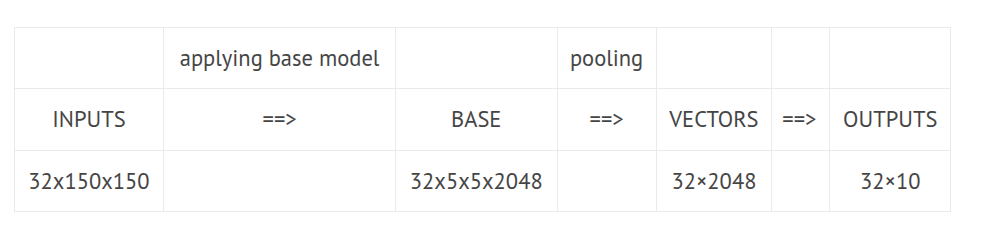

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


(32, 10)

To summarize what we’ve done so far (for one image). We have our t-shirt (150x150x3) as input. Applying the base_model on inputs gives us the “base” (5x5x2048). Applying pooling on “base” we turn this into a one-dimensional vector (2048). On top of this we added the dense layer, which turns the vector representation into predictions. The dimensionality of this is 10 because we have 10 classes. This is what goes to the outputs variable. “outputs” is what we will have when we invoke predict and the input is the X.

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


(32, 10)

In [ ]:
preds[0]

array([ 1.3008184 ,  0.21574959, -0.4069407 , -1.4502362 , -0.29773265,
       -0.6330572 , -0.03529966,  0.30565828,  1.0712885 ,  1.8176198 ],
      dtype=float32)

What’s important the model outputs here just random numbers because we haven’t trained the model yet. The reason for this is, when creating a dense layer it’s initialized with random numbers. That means we now have to train the model.



To train a model, we need:  

1. **Optimizer** – Finds the best weights for the model. The learning rate is like `eta` in XGBoost.  
2. **Loss Function** – Measures errors to guide optimization. Since this is a multi-class classification problem, we use `CategoricalCrossentropy`. For binary classification, use `BinaryCrossentropy`; for regression, use `MeanSquaredError`. The optimizer minimizes this loss by adjusting dense layer parameters.  
3. **`from_logits=True`** – Means the model outputs raw scores (logits) instead of probabilities. Normally, softmax converts logits into probabilities, but here we keep logits as raw scores. If probabilities are needed, set `from_logits=False` and add softmax activation in the dense layer:  

   ```python
   outputs = keras.layers.Dense(10, activation='softmax')(vectors)
   ```

Since we use logits, we keep `from_logits=True` and leave the dense layer code unchanged.

Now we need to compile the model before we can start training it. For compiling we need the optimizer and the loss that we defined before. We’re also interested in monitoring a special metric which is accuracy. At each step of training it will show the progress.

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Now everyrthing is ready for training the model. Here we use the model.fit method which need the training data, the epoch count for how many epochs the model should be trained and the validation data. One epoch means that we go over the whole training dataset once, not image by image, but in batches of size 32 as we have defined before. Last batch can be less than this predefined size of 32 images. When training a model we apply to one batch at a time and when it’s done for all batches we call this one epoch. 10 epoch for example means go over the data 10 times.

The output shows the current loss which is CategoricalCrossentropy and the accuracy for each epoch.

In [ ]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 187ms/step - accuracy: 0.5549 - loss: 1.8572 - val_accuracy: 0.7713 - val_loss: 0.8132
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8358 - loss: 0.5147 - val_accuracy: 0.7977 - val_loss: 0.7834
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8848 - loss: 0.3221 - val_accuracy: 0.7742 - val_loss: 1.0748
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9034 - loss: 0.2878 - val_accuracy: 0.7859 - val_loss: 1.0050
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9436 - loss: 0.1660 - val_accuracy: 0.7859 - val_loss: 0.8779
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9759 - loss: 0.0762 - val_accuracy: 0.7918 - val_loss: 0.8880
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9804 - loss: 0.0647 - val_accuracy: 0.8123 - val_loss: 0.8372
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9877 - loss: 0.0477 - val_accuracy: 0.7947 

This time we want to access the loss and accuracy values. In case of XGBoost we needed to capture the output but here we don’t need to do this because the model.fit method returns an history object which contains all this information

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9702 - loss: 0.0892 - val_accuracy: 0.7889 - val_loss: 1.1076
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9814 - loss: 0.0500 - val_accuracy: 0.8152 - val_loss: 1.0857
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9898 - loss: 0.0396 - val_accuracy: 0.8006 - val_loss: 1.0462
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9807 - loss: 0.0696 - val_accuracy: 0.7889 - val_loss: 1.2249
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9789 - loss: 0.0732 - val_accuracy: 0.8123 - val_loss: 1.0871
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9753 - loss: 0.0805 - val_accuracy: 0.8152 - val_loss: 1.0911
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9919 - loss: 0.0278 - val_accuracy: 0.7947 - val_loss: 1.2837
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9775 - loss: 0.0769 - val_accuracy: 0.8152 - v

The training loss is decreasing, and validation accuracy starts at 72% in the first epoch. Both training and validation accuracy increase until epoch 3, but validation accuracy lags behind by about 10%. Training accuracy keeps improving, but validation accuracy stabilizes around 80%, while training accuracy approaches 1. This suggests overfitting. The results are stored in the history object, focusing on training and validation accuracy.

In [ ]:
history.history['accuracy']

[0.9641460180282593,
 0.9823989272117615,
 0.9879400134086609,
 0.9778357148170471,
 0.9749022126197815,
 0.9771838188171387,
 0.9911994934082031,
 0.9752281904220581,
 0.9859843254089355,
 0.9947848916053772]

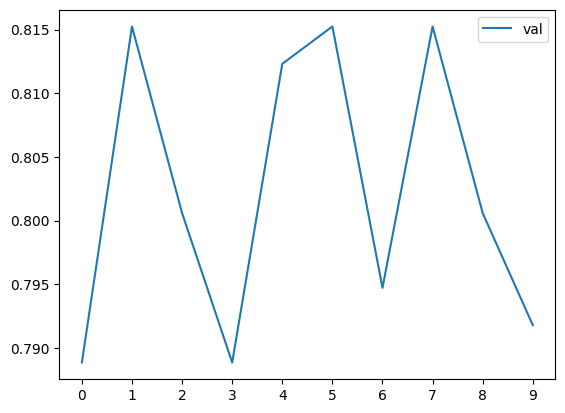

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

The first peak is after one epoch. Maybe the best model is after 4 epochs because the training accuracy is still not very high (<95%). But the model after one epoch is already quite ok. This value of almost 80% is a good one because it’s without any tuning. There are many parameters to tune. We’ll tune the most important one in the next section.

## 8.6 Adjusting the learning rate

Source: https://knowmledge.com/2023/11/23/ml-zoomcamp-2023-deep-learning-part-8/

### What's the learning rate

The learning rate controls how fast a model learns. A high learning rate is like skimming many books quickly—it learns fast but may not retain much, leading to poor validation performance (overfitting). A medium learning rate balances speed and accuracy, leading to good performance. A low learning rate is like reading slowly and carefully—it learns well but too slowly, which may cause underfitting.

### Trying different values

We use the code from the previous section and put it to a function. The middle part of this function could be separated to a function called “create_architecture”, but we’ll keep it simple here.

In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

We want to iterate over different values of learning rate.

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - accuracy: 0.2884 - loss: 2.0671 - val_accuracy: 0.5396 - val_loss: 1.5069
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.5534 - loss: 1.4264 - val_accuracy: 0.6305 - val_loss: 1.1994
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.6336 - loss: 1.1688 - val_accuracy: 0.6686 - val_loss: 1.0357
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.6744 - loss: 1.0140 - val_accuracy: 0.6950 - val_loss: 0.9366
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.6991 - loss: 0.9350 - val_accuracy: 0.7126 - val_loss: 0.8708
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.7275 - loss: 0.8549 - val_accuracy: 0.7361 - val_loss: 0.8181
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.7286 - loss: 0.8107 - val_accuracy: 0.7537 - val_loss: 0.7791
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7583 - loss: 0.7596 - val_accuracy: 

In [ ]:
del scores[0.1]
del scores[0.0001]

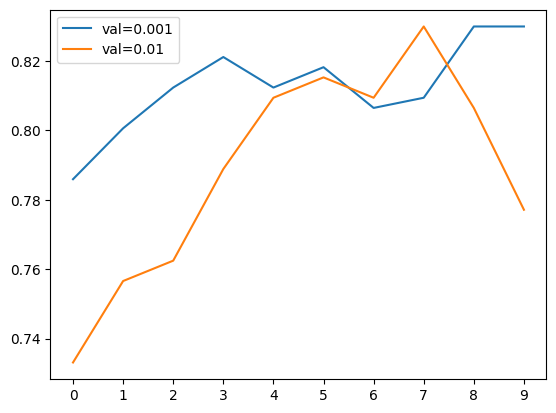

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

What we did so far we tried different models with different learning rates and the we choose this one that is best on validation data. Another interesting thing is comparing the difference between train and validation data between different learning rates – the smaller the better.

## 8.7 Checkpointing

Checkpointing is a way of saving our model after each iteration or when certain conditions are met, f.e. when the model achieves the best performance so far. This is a nice way because when the model starts to oscillate, the model after 10 iterations is not necessarily the best one.


## Saving the best model only
How can we do this? After each epoch we trained we can evaluate the performance of the model on validation dataset. This we do for every epoch, then we look at the numbers and can invoke a callback. With this callback we can do anything we want. The evaluation on validation data is kind of callback. The history with all information is also kind of such a callback. This is just something we invoke after each epoch finishes


### Training a model with callbacks

In [ ]:
# model.save_weights('model_v1.h5', save_format='h5')
model.save_weights('model_v1.h5.weights.h5')

In [ ]:
# model.save_weights('model_v1.h5')

# Keras uses this template for saving files.
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3, val_accuracy=0.84)

# Output: 'xception_v1_03_0.840.h5'

'xception_v1_03_0.840.h5'

save_best_only=True to save only when it’s an improvement regarding the last best result. mode='max' because we want to have a maximized accuracy, if we would use a loss value we should take mode='min'.

In [ ]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

Now we can use this defined callback and retrain the best model using this callback.

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5057 - loss: 1.4718

96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.5069 - loss: 1.4680 - val_accuracy: 0.7889 - val_loss: 0.6739
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7778 - loss: 0.6551

96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.7778 - loss: 0.6548 - val_accuracy: 0.8211 - val_loss: 0.5981
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8264 - loss: 0.5148 - val_accuracy: 0.8182 - val_loss: 0.5611
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8696 - loss: 0.4314 - val_accuracy: 0.8182 - val_loss: 0.5601
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8849 - loss: 0.3699

96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.8849 - loss: 0.3699 - val_accuracy: 0.8387 - val_loss: 0.5266
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9217 - loss: 0.3069 - val_accuracy: 0.8328 - val_loss: 0.5254
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9231 - loss: 0.2947 - val_accuracy: 0.8270 - val_loss: 0.5222
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9401 - loss: 0.2529 - val_accuracy: 0.8270 - val_loss: 0.5207
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9469 - loss: 0.2334 - val_accuracy: 0.8299 - val_loss: 0.5306
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9533 - loss: 0.2040 - val_accuracy: 0.8270 - val_loss: 0.5218


## 8.8 Adding more layers

Source: https://knowmledge.com/2023/11/25/ml-zoomcamp-2023-deep-learning-part-10/

### Adding one inner dense layer
It’s possible to add more inner layers after the vector representation. Previously we had one inner layer before outputting the prediction. This layer does some intermediate processing of the vector representation. These inner layers make the neural network more powerful.

Usually adding one or two additional layers help and this is something we want to test. This layer we want to add is between the previous input and output. Let’s add one inner dense layer with size of 100. For this new layer we need an activation. In neural networks each layer should have some transformation in order to achieve better performance. We will use here “relu” as activation function.

Activation functions:

- SIGMOID (mostly used for output)
- SOFTMAX (mostly used for output)
- RELU (mostly used for intermediate layers, default value)
…

For more information on that topic look check again the mentioned CS231n course (Neural Networks Part 1: Setting up the Architecture -> Commonly used activation functions)

To see how much gpu is utilized you can open a terminal right from Jupyter notebook and type “nvidia-smi”


### Experimenting with different sizes of inner layer

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.4258 - loss: 1.6818 - val_accuracy: 0.6481 - val_loss: 1.1203
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.7171 - loss: 0.9081 - val_accuracy: 0.7302 - val_loss: 0.8739
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.7965 - loss: 0.6674 - val_accuracy: 0.7683 - val_loss: 0.7264
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8294 - loss: 0.5449 - val_accuracy: 0.7595 - val_loss: 0.7048
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8729 - loss: 0.4412 - val_accuracy: 0.7830 - val_loss: 0.6571
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.8785 - loss: 0.3905 - val_accuracy: 0.7830 - val_loss: 0.6358
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9115 - loss: 0.3165 - val_accuracy: 0.7830 - val_loss: 0.6125
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9296 - loss: 0.2789 - val_accuracy: 0.79

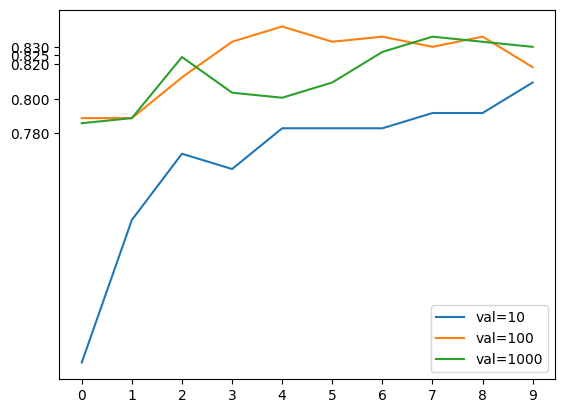

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

When we cannot see an improvement compared to the less complex model then it’s fine to go with this easier one. But in the next section we want to look at the effects of regularization and dropout so let’s use the more complex neural network for now.

## 8.9 Regularization and dropout

Source: https://knowmledge.com/2023/11/26/ml-zoomcamp-2023-deep-learning-part-11/

When training a model for 10 epochs, the model sees the same image 10 times, which can lead to overfitting. For example, if the model recognizes a specific detail like a logo, it may incorrectly classify all images with that logo as the same category (e.g., t-shirts), resulting in poor generalization and many classification errors on validation data. To improve generalization, the model should focus on broader features like shapes rather than specific details.

Dropout is a technique inspired by the idea of randomly hiding parts of an image, but instead of hiding image parts, it applies this concept to the inner layers of the neural network. For instance, in a fully connected dense layer with four inputs and three outputs, dropout freezes a portion of the layer during each iteration, preventing that portion from being updated. In the next iteration, a different portion is frozen. This forces the network to focus on the "bigger picture" (e.g., shapes) rather than specific details. However, the output layer still receives input from all parts of the network, including the frozen ones.

Dropout acts as a form of regularization, preventing the network from overfitting to non-existent patterns. A dropout rate of 0.5 means 50% of the layer is frozen in each iteration. Importantly, dropout maintains the dimensionality of the layer.

We’ll look at these points:

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

The downside of dropout is that you’ll need more iterations to learn something. Therefor we change the value from 10 to 30.

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
[2021-11-03 21:19:20.707 ip-172-16-13-140:18999 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-03 21:19:20.814 ip-172-16-13-140:18999 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/30
96/96 [==============================] - 56s 583ms/step - loss: 0.9642 - accuracy: 0.6747 - val_loss: 0.6832 - val_accuracy: 0.7566
Epoch 2/30
96/96 [==============================] - 15s 158ms/step - loss: 0.5163 - accuracy: 0.8230 - val_loss: 0.6058 - val_accuracy: 0.7918
Epoch 3/30
96/96 [==============================] - 15s 160ms/step - loss: 0.3458 - accuracy: 0.8885 - val_loss: 0.5577 - val_accuracy: 0.8270
Epoch 4/30
96/96 [==============================] - 15s 161ms/step - loss: 0.2575 - accuracy: 0.9218 - val_loss: 0.5166 - val_accuracy: 0.8416
Epoch 5/30
96/96 [==============================] - 15s 1

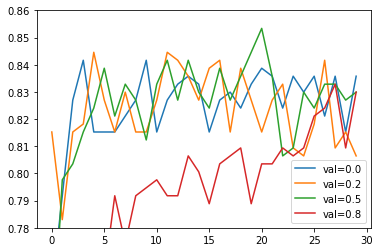

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

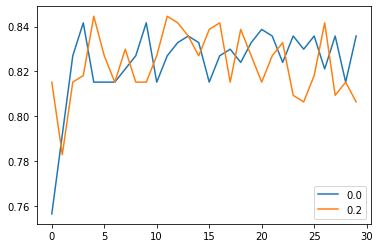

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

Source: https://knowmledge.com/2023/11/27/ml-zoomcamp-2023-deep-learning-part-12/

Data augmentation is another method to improve a neural network's performance by preventing it from overfitting to specific details, like logos, and instead focusing on general features, such as shapes. While dropout helps by randomly freezing parts of the network during training, data augmentation creates more varied training data by generating new images from existing ones. For example, instead of showing the same t-shirt image repeatedly, you can create 10 modified versions of it, so the network sees different variations each time.

There are many ways to transform images for data augmentation, and these can be combined:

1. **Flip**: Flip the image vertically or horizontally.
2. **Rotate**: Rotate the image at different angles.
3. **Shift**: Move the image up, down, left, or right.
4. **Shear**: Skew the image, like moving only the top-right and bottom-right corners.
5. **Zoom**: Zoom in or out slightly to shrink or expand the image.
6. **Brightness/Contrast**: Adjust the brightness or contrast of the image.
7. **Black Patch**: Randomly place a black patch on the image to hide parts of it (similar to the dropout idea but applied directly to the image).

In Keras, you can use an image data generator to apply these transformations automatically. There’s also a Jupyter notebook in the `mlbookcamp-code` repository under `chapter-07-neural-nets/07-augmentations.ipynb` that demonstrates how to use data augmentations. This technique helps the model generalize better by exposing it to a wider variety of image variations during training.


* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

### Training a model with augmentations

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    shear_range=10,
    zoom_range=0.1,
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=True,
)

### How to select data augmentations?


- Use your own judgement (does is make sense?) –> For example if you don’t expect to see horizontally flipped images, then this wouldn’t make sense here as well.
- Look at the dataset, what kind of variations are there?
  - Are the objects always centered? –> If not you can think about shifting and rotation.
- Tune it as a hyperparameter – Try different augmentations and see what works and what doesn’t.
 - Train it with new augmentation for 10-20 epochs. If it’s better then use it, if not then don’t use it. If it’s the same or similar result then train for some more epochs (like 20) and make the comparison again.

Playing around with the parameters of the previous snippet, the working parameters decrease a bit. The parameters can be applied to the training dataset, but we leave the validation dataset unchanged, because we want to have consistent results. Remember the parameter changes happen randomly and cannot be reproduced.

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/50
96/96 [==============================] - 19s 200ms/step - loss: 1.0738 - accuracy: 0.6346 - val_loss: 0.6670 - val_accuracy: 0.7859
Epoch 2/50
96/96 [==============================] - 16s 162ms/step - loss: 0.6210 - accuracy: 0.7846 - val_loss: 0.5732 - val_accuracy: 0.8182
Epoch 3/50
96/96 [==============================] - 16s 162ms/step - loss: 0.4573 - accuracy: 0.8387 - val_loss: 0.5620 - val_accuracy: 0.8182
Epoch 4/50
96/96 [==============================] - 15s 161ms/step - loss: 0.3637 - accuracy: 0.8797 - val_loss: 0.5376 - val_accuracy: 0.8094
Epoch 5/50
96/96 [==============================] - 16s 162ms/step - loss: 0.2951 - accuracy: 0.9042 - val_loss: 0.5465 - val_accuracy: 0.8065
Epoch 6/50
96/96 [==============================] - 16s 162ms/step - loss: 0.2348 - accuracy: 0.9283 - val_loss: 0.6016 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] 

KeyboardInterrupt: 

When doing augmentation it can happen, that the utilization of the GPU is not >90%. The reason could be that the augmentation is done by the CPU. After generating the new images, the GPU can fit the model. This is done for every epoch. To avoid that there are some complex things. While doing augmenting and fitting in a sequential order (first CPU: augmentation, second GPU: fitting) the CPU can start the second augmentation process right after the first one, then CPU and GPU are more utilized over time. Keras doesn’t do this, but there are ways of doing this. (Google: tensorflow training pipeline with preprocessing -> tensorflow.org/guide/data_performance, and tensorflow.org/guide/data

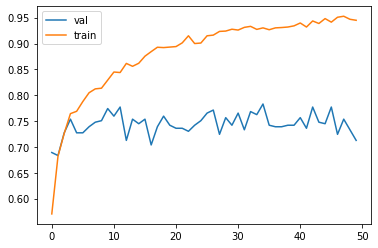

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

Doing this testing with data augmentation we realize that this is not really helpful in this case, usually it is. Alexey said “Tuning neural networks is more art than science”. For this case here we can go with our untuned network that has an accuracy of around 84% which is sufficient for most of the use cases.

## 8.11 Training a larger model

Source: https://knowmledge.com/2023/11/28/ml-zoomcamp-2023-deep-learning-part-13/

In the sections before we use images of size 150×150 because the model can be trained faster (here:4 times faster). This is a good way when experimenting with parameters. Now we want to train on bigger images – let’s use images of size 299×299. Therefor we reuse the previous code for training and do a few changes.

We will use a new parameter input_size with default value of 150.

### Train a 299×299 model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
input_size = 299

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/50
96/96 [==============================] - 78s 816ms/step - loss: 1.0387 - accuracy: 0.6793 - val_loss: 0.5567 - val_accuracy: 0.8211
Epoch 2/50
96/96 [==============================] - 77s 805ms/step - loss: 0.5472 - accuracy: 0.8214 - val_loss: 0.4331 - val_accuracy: 0.8622
Epoch 3/50
96/96 [==============================] - 74s 772ms/step - loss: 0.4525 - accuracy: 0.8491 - val_loss: 0.4360 - val_accuracy: 0.8504
Epoch 4/50
96/96 [==============================] - 75s 778ms/step - loss: 0.4000 - accuracy: 0.8605 - val_loss: 0.3728 - val_accuracy: 0.8856
Epoch 5/50
96/96 [==============================] - 75s 785ms/step - loss: 0.3586 - accuracy: 0.8853 - val_loss: 0.3832 - val_accuracy: 0.8768
Epoch 6/50
96/96 [==============================] - 75s 777ms/step - loss: 0.3261 - accuracy: 0.8934 - val_loss: 0.3828 - val_accuracy: 0.8827
Epoch 7/50
96/96 [==============================] 

KeyError: 'val_accuracy'

## 8.12 Using the model

In the last section we trained the final model – model on bigger images and saved the best one which we want to use now to test it on test dataset and make predictions. In this article we will cover:

* Loading the model
* Evaluating the model
* Getting predictions

### Loading the model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [ ]:
# model = keras.models.load_model('xception_v4_1_13_0.903.h5')
model = keras.models.load_model('xception_v1_09_0.839.h5')

### Evaluating the model

The evaluation is done quite easily just use the evaluate function of the model and provide the test data. The output consists of two numbers. The first value is the loss value and the second one is the accuracy on test dataset. When the accuracy is almost the same like the model performance was before means that the model does not overfit and we trained a good model.

In [ ]:
model.evaluate(test_ds)

  ...
    to  
  ['...']
12/12 [==============================] - 8s 645ms/step - loss: 0.2939 - accuracy: 0.8978


[0.29389633300403756, 0.89784944]

### Getting predictions

In [ ]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [ ]:
img = load_img(path, target_size=(299, 299))

In [ ]:
import numpy as np

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
dict(zip(classes, pred[0]))

{'dress': -1.4282539,
 'hat': -5.522186,
 'longsleeve': -3.1655293,
 'outwear': -2.201648,
 'pants': 9.294684,
 'shirt': -3.4289198,
 'shoes': -4.2395606,
 'shorts': 3.4339347,
 'skirt': -4.194675,
 't-shirt': -2.9939806}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

